Good tutorials on Data Management can be found on the UNC website:

http://www.cpc.unc.edu/research/tools/data_analysis/statatutorial

Linear Regression using Stata

http://www.princeton.edu/~otorres/#01

# Problem set 1




## Linear regression of MRW - an example

Mankiw, Romer and Weil (QJE, 1992) present cross-section regression
models for the log of income per capita, estimated using a sample of 98
countries

simplified version of the paper.

http://www.nuff.ox.ac.uk/teaching/economics/bond/MRW%20example.pdf



## OLS Regression for MRW Using Stata – A Very Basic Introduction

The Stata dataset MRW.DTA contains data on real GDP per capita and related variables from the Penn World Table for a sample of 121 countries. This dataset was used to estimate growth equations by N.G.Mankiw, D.Romer and D.N.Weil, “A contribution to the empirics of economic growth”, Quarterly Journal of Economics, 1992.

The dataset can be downloaded from:
http://www.nuffield.ox.ac.uk/teaching/economics/bond/ 


The dataset contains 11 variables:

    number a country identifier between 1 and 121 
    
    country country name (a string variable)
    
    n a dummy variable equal to one if the country is included in the    non-oil sample
    
    i a dummy variable equal to one if the country is included in the    intermediate sample
    
    o a dummy variable equal to one if the country is included in the    oecd sample
    
    
    
    rgdpw60 real GDP per working age population in 1960
    
    rgdpw85 real GDP per working age population in 1985
    
    gdpgrowth average annual growth rate of real GDP per working age
    
    population between 1960 and 1985
    
    popgrowth average annual growth rate of the working age population    between 1960 and 1985
    
    i_y real investment as a share of real GDP, averaged over the period    1960-85
    
    school % of working age population in secondary school 







http://www.nuff.ox.ac.uk/teaching/economics/bond/OLS%20Regression%20Using%20Stata.pdf


```
    set more off
    use c:\temp\mrw, clear
    log using c:\temp\mrwexample, replace
    gen lrgdpw85=ln(rgdpw85)
    gen li_y=ln(i_y/100)
    gen lpop=ln(0.05+popgrowth/100)
    reg lrgdpw85 li_y lpop if n==1
    test lpop = -li_y
    log close
    exit 
```


## STATA tips for MRW paper


### Some useful commands

```
describe [varlist] - lists variable names, types and labels
summarize [varlist] - basic descriptive statistics
summarize [varlist], detail - more descriptive statistics
list [varlist] - displays values
list [varlist] if [condition] - displays values if the specified condition is true 
```


### Examples

```
    describe
    summarize
    su rgdpw85 if n==1
    list if country==“Algeria” 
```

Another useful command is generate. This allows new variables to be created by transforming the existing ones. e.g.

#### Generate new variables

   generate lrgdpw85=ln(rgdpw85)
   gen li_y=ln(i_y/100)
   g lpop=ln(0.05+popgrowth/100) 


### OLS regression

regress is Stata’s basic command to compute OLS estimates.

Having generated the variables lrgdpw85, li_y and lpop as above, we can use the command


    regress lrgdpw85 li_y lpop if n==1 

#### To reproduce the results for the restricted specification, we generate the variable

     gen li_lpop=li_y-lpop
 
We can then use the command

     reg lrgdpw85 li_lpop if n==1
 
#### Heteroskedasticity-robust standard errors

These can be obtained using the , vce(robust) option.

    regress lrgdpw85 li_y lpop if n==1, vce(r)

In this example the robust standard errors are similar to the default standard errors, suggesting that heteroskedasticity may not be important in this model.


#### Hypothesis tests

A 95% confidence intervals are reported for each estimated coefficient, as are t-statistics and p-values for tests of the null hypothesis that the corresponding coefficient is zero.
The F-statistic tests the null hypothesis that all the slope coefficients are zero.Other joint tests can be obtained using the test command.

e.g. to test the restriction that the coefficient on lpop is -1 times the coefficient on li_y, we could type

     test lpop = -li_y
 
in the command window, after estimating the model of interest.

Note that Stata reports an F(p,df) version of the test statistic, where p is the number of restrictions being tested, and df is the degrees of freedom N-K.

The test command allows other kinds of linear restrictions to be tested. 

The testnl command allows non-linear restrictions to be tested. 

#### Storing results
To store all results printed to the results window in a plain text file, first open a log
file by typing

     log using filename.log
 
in the command window. To stop subsequent results being saved in the log file, type

     file log close
 
in the command window.

Alternatively to save results in a Stata output file, either click File Log Begin, or click
the Begin Log button on the toolbar. To stop subsequent results being saved in this
way, either click File Log Close, or click the Close Log button on the toolbar. The
resulting files can be viewed using Stata’s viewer.


#### Storing commands
For more serious use, commands can be stored in a simple program called a
filename.do file, and executed from within the Do File Editor


A simple example of a .do file could contain the commands

```
    set more off
    use c:\temp\mrw, clear
    log using c:\temp\mrwexample, replace
    gen lrgdpw85=ln(rgdpw85)
    gen li_y=ln(i_y/100)
    gen lpop=ln(0.05+popgrowth/100)
    reg lrgdpw85 li_y lpop if n==1
    test lpop = -li_y
    log close
    exit 
```




### Some Stata Help:

To do most things in Stata, you can either use the menus or the command line. 

For example, to create a scatter plot in Stata, you can either use the menu sequence Graphics > Twoway Graph
or use the command twoway (scatter variable1 variable2) at the command line.

Note that you can also select other options such as setting the marker labels for the points in the scatter plot to be the country names, so that you can see which country is represented by each point.




: Restricted OLS estimation, tabulated Stata output.

http://academics.hamilton.edu/economics/cgeorges/macro-topics-files/growth-regressions.pdf


-------------------------------
## Put output to word document

http://www.princeton.edu/~otorres/Outreg2.pdf


```
    ssc install outreg2

    *Follow this example 

    use "http://dss.princeton.edu/training/Panel101.dta", clear

    reg y x1, robust

    outreg2 using myreg.doc, replace ctitle(Model 1) label

    *You can add other model (using variable x2) by using the option append

    *(NOTE: make sure to close myreg.doc)

    reg y x1 x2, robust

    outreg2 using myreg.doc, append ctitle(Model 2) label

    use "http://dss.princeton.edu/training/Panel101.dta", clear

    logit y_bin x1

    outreg2 using mymod.doc, replace ctitle(Logit coeff)

    logit y_bin x1 

    * or

    outreg2 using mymod.doc, append ctitle(Odds ratio) eform

```


## All example

http://www.ats.ucla.edu/stat/stata/examples/chp/chpstata3.htm

http://www.princeton.edu/~otorres/#01

### A sample ipystata session

Below is a simple example of this second method in use.  For more details see the [example notebook](http://nbviewer.jupyter.org/github/TiesdeKok/ipystata/blob/master/ipystata/Example.ipynb) and documentation on the ipystata repository.

## Basic stata with MRW
http://www.nuff.ox.ac.uk/teaching/economics/bond/OLS%20Regression%20Using%20Stata.pdf


## Stata tutorial
http://www.ncer.edu.au/events/documents/Singapore_lecture1.pdf

## Other data source
http://www.owlnet.rice.edu/~econ446/StewartData/


## Macrocomplab

https://sites.google.com/site/macrocomplab/curriculum

In [41]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import ipystata

The following opens a Stata session where we load a dataset and summarize the data.  The ```-o``` flag following the `%%Stata` magic instructs it to output or return the dataset in Stata memory as a pandas dataframe in python.  The argument `-d` or `--data` is used to define which dataframe should be set as dataset in Stata.

In [9]:
%%stata -o mrw_df
use http://www.owlnet.rice.edu/~econ446/StewartData/Stata/mrw.dta
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     country |         75    71.26667    32.58599          1        120
       gdp60 |         75     3620.76    2999.976        383      12362
       gdp85 |         75    6589.827    5410.907        608      19723
         pop |         75    2.166667    .9751415         .3        4.3
        igdp |         75    19.35067    7.565951        5.4       36.9
-------------+---------------------------------------------------------
      school |         75    6.381333    3.233093         .5       11.9


In [31]:
%%stata -o mrw_df
use "G:\project\project2\econ\Economics_note\macroeconomics\econ501\lab\lab04\Mrw.dta", clear
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      number |        121          61    35.07373          1        121
     country |          0
       ccode |          0
          sn |        121    .8099174    .3939977          0          1
          si |        121    .6198347    .4874457          0          1
-------------+---------------------------------------------------------
          so |        121    .1818182    .3872983          0          1
     gdp1960 |        116    3681.819    7492.878        383      77881
     gdp1985 |        108    5683.259    5688.671        412      25635
     workpop |        107    2.279439    .9987481         .3        6.8
      invest |        121    18.15702     7.85331        4.1       36.9
-------------+---------------------------------------------------------
      school |        118    5.526271    3.532037         .4       12.1


In [32]:
%%stata -d mrw_df -o mrw_df --graph 
* drop missing observations
drop if gdp1985==. | gdp1960==.
*Keep only the non-oil countries
keep if sn==1
* generate new variables
gen lny85=ln(gdp1985)
gen lny60=ln(gdp1960)
gen g=(lny85-lny60)/25
scatter lny85 lny60, mlabel(ccode)


. drop if gdp1985==. | gdp1960==.
(16 observations deleted)
. keep if sn==1
(7 observations deleted)


Let's confirm the data was returned as a pandas dataframe:

In [13]:
mrw_df.head(3)

,number,country,ccode,sn,si,so,gdp1960,gdp1985,workpop,invest,school
0,1,Algeria,DZA,1,1,0,2485.0,4371.0,2.6,24.1,4.5
1,2,Angola,AGO,1,0,0,1588.0,1171.0,2.1,5.8,1.8
2,3,Benin,BEN,1,0,0,1116.0,1071.0,2.4,10.8,1.8


A simple ols regression in Stata:

In [29]:
%%stata -d mrw_df -o mrw_df
* ols
reg g lny60


. drop if gdp1985==. | gdp1960==.
(16 observations deleted)
. keep if sn==1
(7 observations deleted)
. gen lny85=ln(gdp1985)
. reg g lny60

      Source |       SS           df       MS      Number of obs   =        98
-------------+----------------------------------   F(1, 96)        =      3.61
       Model |  .701048806         1  .701048806   Prob > F        =    0.0603
    Residual |  18.6277499        96  .194039061   R-squared       =    0.0363
-------------+----------------------------------   Adj R-squared   =    0.0262
       Total |  19.3287987        97  .199265966   Root MSE        =     .4405

------------------------------------------------------------------------------
           g |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lny60 |   .0943109   .0496172     1.90   0.060    -.0041785    .1928003
       _cons |  -.2665776   .3796046    -0.70   0.484    -1.020087  

In [34]:
%%stata -d mrw_df -o mrw_df --graph
twoway (scatter g lny60) (lfit g lny60)

In [37]:
%%stata -d mrw_df -o mrw_df 
regress g lny60 
estimates store basic
regress g lny60 workpop invest school 
estimates store expanded


estimates table basic expanded, b(%7.4f) star


      Source |       SS           df       MS      Number of obs   =        98
-------------+----------------------------------   F(1, 96)        =      3.61
       Model |  .701048806         1  .701048806   Prob > F        =    0.0603
    Residual |  18.6277499        96  .194039061   R-squared       =    0.0363
-------------+----------------------------------   Adj R-squared   =    0.0262
       Total |  19.3287987        97  .199265966   Root MSE        =     .4405

------------------------------------------------------------------------------
           g |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lny60 |   .0943109   .0496172     1.90   0.060    -.0041785    .1928003
       _cons |  -.2665776   .3796046    -0.70   0.484    -1.020087    .4869316
------------------------------------------------------------------------------

      Source |       SS           df       MS    

Tip: Stata’s built-in est table has various limitations. One of Stata’s strongest features is the large number of user-written extensions to Stata. The package estout by Ben Jann has a command esttab with a number of options that Stata’s official command does not, including the ability to output tables to RTF format (i.e., Wordcompatible) files. To find it and install it, just type

`findit estout`


and follow the instructions – a few clicks – to install.

### Create a dummy variable and interaction term

In [40]:

%%stata -d mrw_df -o mrw_df 

* local macro control variables

local controlvar workpop  invest  school

*Create a dummy variable for Africa

gen duma=1 if number>=1 & number<=43

replace duma=0 if duma==.


* create interaction terms

foreach var in workpop  invest  school{
    gen duma`var'=duma*`var'
}

*OLS regression of the full model
reg g lny60 workpop  invest  school  duma*



. local controlvar workpop  invest  school
. gen duma=1 if number>=1 & number<=43
(60 missing values generated)
(60 real changes made)
. foreach var in workpop  invest  school{. reg g lny60 workpop  invest  school  duma*

      Source |       SS           df       MS      Number of obs   =        98
-------------+----------------------------------   F(8, 89)        =     12.41
       Model |  10.1924866         8  1.27406083   Prob > F        =    0.0000
    Residual |  9.13631204        89  .102655191   R-squared       =    0.5273
-------------+----------------------------------   Adj R-squared   =    0.4848
       Total |  19.3287987        97  .199265966   Root MSE        =     .3204

------------------------------------------------------------------------------
           g |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lny60 |  -.3333311   .0632149    -5.27   0.000    -.458937

In [ ]:
%%stata -d mrw_df -o mrw_df


In [26]:
mrw_df.columns

Index(['number', 'country', 'ccode', 'sn', 'si', 'so', 'gdp1960', 'gdp1985',
       'workpop', 'invest', 'school', 'lny85', 'lny60', 'g'],
      dtype='object')

In [29]:
# mrw_df.lni not working for new variables
mrw_df['lni'] = np.log(mrw_df.invest/100)
mrw_df['lnd'] = np.log(mrw_df.workpop/100+0.05)
mrw_df['lns'] = np.log(mrw_df.school)

In [32]:
mrw_df.columns

Index(['number', 'country', 'ccode', 'sn', 'si', 'so', 'gdp1960', 'gdp1985',
       'workpop', 'invest', 'school', 'lny85', 'lny60', 'g', 'lni', 'lnd',
       'lns'],
      dtype='object')

In [30]:
mrw_df.head()

,number,country,ccode,sn,si,so,gdp1960,gdp1985,workpop,invest,school,lny85,lny60,g,lni,lnd,lns
0,1,Algeria,DZA,1,1,0,2485.0,4371.0,2.6,24.100000,4.5,8.382747,7.818028,0.564719,-1.422958,-2.577022,1.504077
1,2,Angola,AGO,1,0,0,1588.0,1171.0,2.1,5.800000,1.8,7.065613,7.370231,-0.304617,-2.847312,-2.645075,0.587787
2,3,Benin,BEN,1,0,0,1116.0,1071.0,2.4,10.800000,1.8,6.976348,7.017506,-0.041158,-2.225624,-2.603690,0.587787
3,4,Botswana,BWA,1,1,0,959.0,3671.0,3.2,28.299999,2.9,8.208220,6.865891,1.342329,-1.262308,-2.501036,1.064711
4,5,Burkina Faso,BFA,1,0,0,529.0,857.0,0.9,12.700000,0.4,6.753438,6.270988,0.482450,-2.063568,-2.830218,-0.916291


And now let's push the modified dataframe into the Stata dataset with the ```-d``` flag:

In [31]:
%%stata -d mrw_df
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |        121          60    35.07373          0        120
      number |        121          61    35.07373          1        121
     country |          0
       ccode |          0
          sn |        121    .8099174    .3939977          0          1
-------------+---------------------------------------------------------
          si |        121    .6198347    .4874457          0          1
          so |        121    .1818182    .3872983          0          1
     gdp1960 |        116    3681.819    7492.878        383      77881
     gdp1985 |        108    5683.259    5688.671        412      25635
     workpop |        107    2.279439    .9987481         .3        6.8
-------------+---------------------------------------------------------
      invest |        121    18.15702     7.85331        4.1       36.9
      schoo

A Stata plot:

In [26]:
%%stata -d mrw_df --graph 
graph twoway (scatter g lny60) (lfit g lny60)

Now on the python side use lmplot from the seaborn library to graph a similar scatter and fitted line but by region.

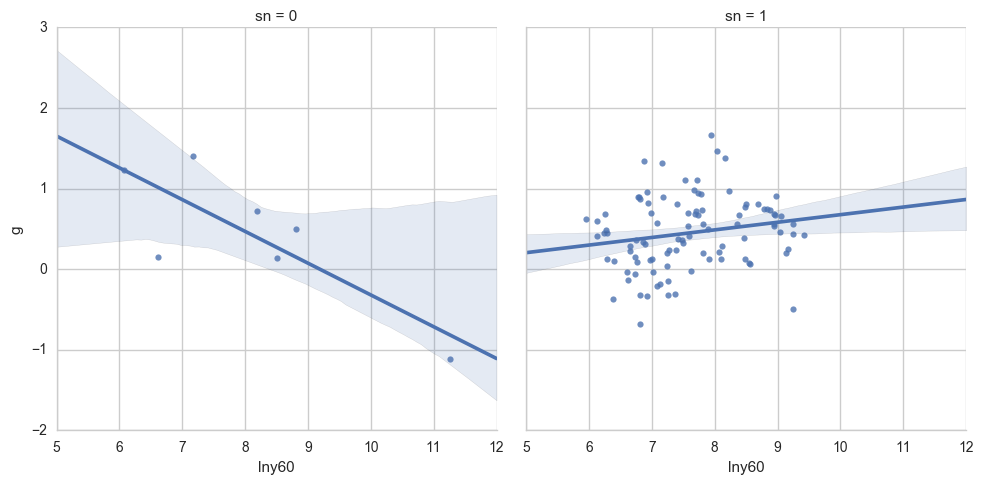

In [11]:
sns.set_style("whitegrid")
g=sns.lmplot(y='g', x='lny60', col='sn', data=mrw_df,col_wrap=2)

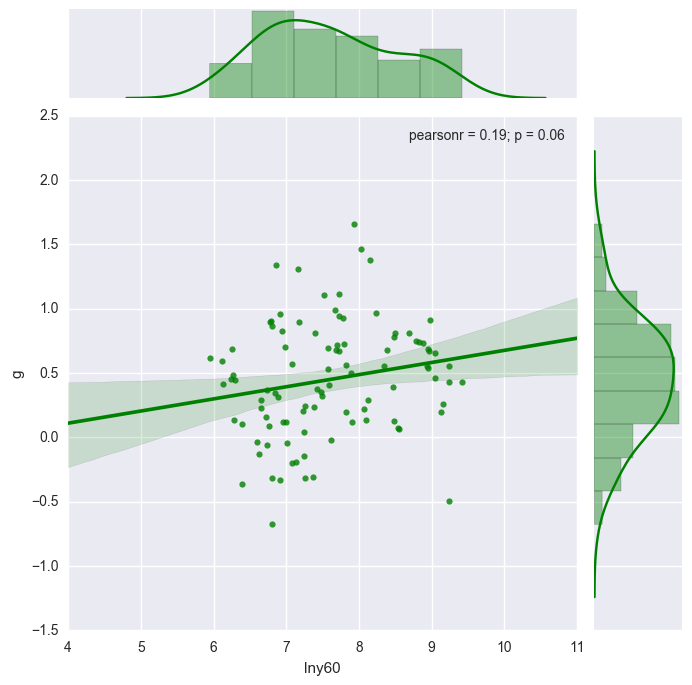

In [10]:
from ipywidgets import interact, FloatSlider, RadioButtons
country_buttons = RadioButtons(options=
        [1, 0])
@interact(country=country_buttons)
def jplot(country):
    sns.jointplot("lny60", "g", data=mrw_df[mrw_df.sn == country], 
                  kind="reg", color ="g", size=7)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


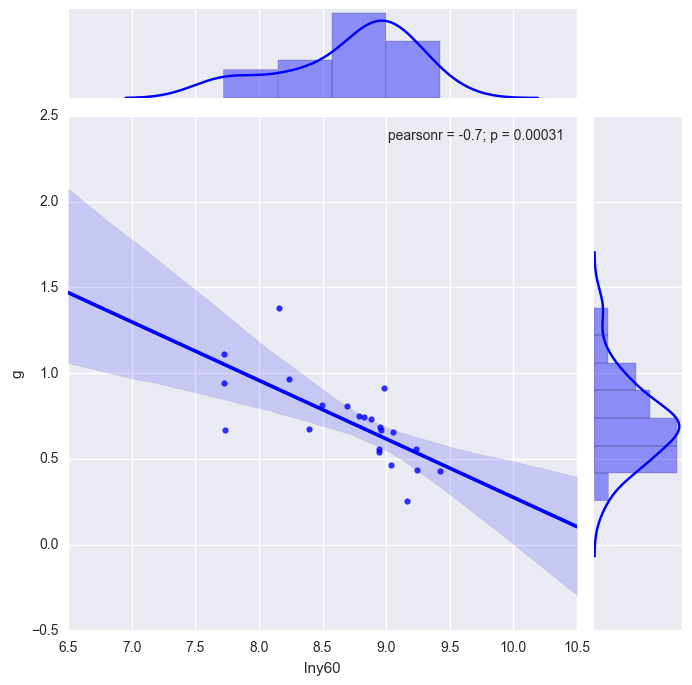

In [13]:
from ipywidgets import interact, FloatSlider, RadioButtons
country_buttons = RadioButtons(options=
        [1, 0])
@interact(country=country_buttons)
def jplot(country):
    sns.jointplot("lny60", "g", data=mrw_df[mrw_df.so == country], 
                  kind="reg", color ="b", size=7)

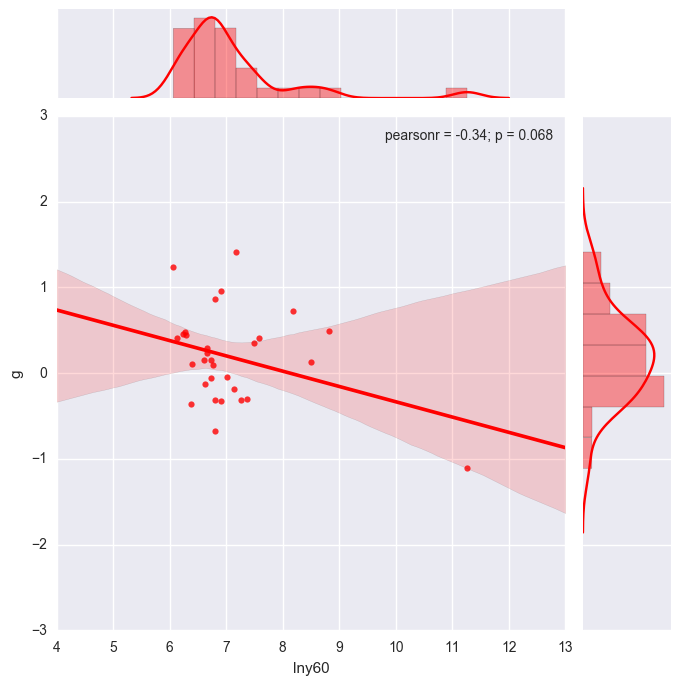

In [14]:
from ipywidgets import interact, FloatSlider, RadioButtons
country_buttons = RadioButtons(options=
        [1, 0])
@interact(country=country_buttons)
def jplot(country):
    sns.jointplot("lny60", "g", data=mrw_df[mrw_df.si == country], 
                  kind="reg", color ="r", size=7)

In [7]:
pd.ols(y=mrw_df.g, x=mrw_df.lny60)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         105
Number of Degrees of Freedom:   2

R-squared:         0.0000
Adj R-squared:    -0.0097

Rmse:              0.4783

F-stat (1, 103):     0.0048, p-value:     0.9446

Degrees of Freedom: model 1, resid 103

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0034     0.0482       0.07     0.9446    -0.0912     0.0979
     intercept     0.4233     0.3711       1.14     0.2567    -0.3041     1.1507
---------------------------------End of Summary---------------------------------

## Stata in a jupyter notebook

http://dev-ii-seminar.readthedocs.io/en/latest/notebooks/Stata_in_jupyter.html

The jupyter notebook project is now designed to be a 'language agnostic' web-application front-end for any one of many possible software language kernels.  We've been mostly using python but there are in fact several dozen [other language kernels](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) that can be made to work with it. 

The ecosystem of libraries and packages for scientific computing with python is huge and constantly growing but there are still many statistics and econometrics applications that are available as built-in or user-written modules in Stata that have not yet been ported to python or are just simply easier to use in Stata.  On the other hand there are some libraries such as python  pandas and different visualization libraries such as seaborn or matplotlib that give features that are not available in Stata. 

Fortunately you don't have to choose between using Stata or python, you can use them both together, to get the best of both worlds.    

There are at least two ways to run Stata in a jupyter notebook by itself or together with python. Both methods naturally require that you also have Stata installed on your machine to run and that you setup something called [Stata automation](http://www.stata.com/automation/#createmsapp) which seems to be possible only on Windows machines.  Both are relatively easy to setup.




- *[Method 1: stata-kernel](https://github.com/jrfiedler/stata-kernel):* James Fiedler has written a kernel for Stata which allows you to create and run standalone interactive Stata notebook sessions. Inline plots do not seem possible.  

- *[Method 2: ipystata](https://github.com/TiesdeKok/ipystata):* Ties de Kok has written a nice python library that allows one to write and execute Stata code in cellblocks that are preceded by a ```%%stata``` magic command in a notebook that is otherwise running python. This allows you to pass data between python and Stata sessions and to display Stata plots inline. 

In [23]:
%%stata graph_session --graph
use http://www.ats.ucla.edu/stat/stata/notes/hsb2, clear
graph twoway scatter read math, name(a, replace) title("Graph a")

graph twoway scatter math science, name(b, replace) title("Graph b")

UsageError: unrecognized arguments: -s graph_session


In [1]:
from IPython.core.display import HTML, Image
css_file = '../../../../custom.css'
HTML(open(css_file, 'r').read())